In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


<ipython-input-3-7d4d9a42e51e>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


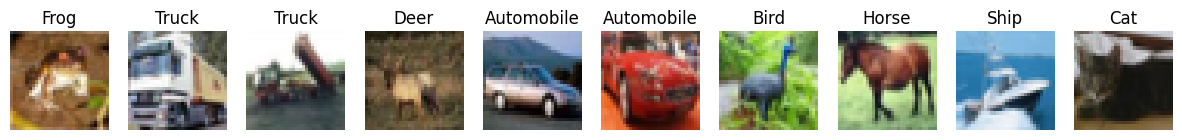

In [3]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')

plt.show()

In [4]:
from sklearn.utils import shuffle

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, y_train = shuffle(x_train, y_train)

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_valid = to_categorical(y_valid, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Softmax, Flatten, Dense, Activation, Dropout, BatchNormalization

In [16]:
from types import MethodDescriptorType
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation("softmax"))

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=0.1, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
h = model.fit_generator(aug.flow(x_train, y_train, batch_size=128), validation_data=(x_valid, y_valid), steps_per_epoch=x_train.shape[0]//128, epochs=10, verbose=1)

Epoch 1/10


<ipython-input-19-eeda0b316a0f>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(aug.flow(x_train, y_train, batch_size=128), validation_data=(x_valid, y_valid), steps_per_epoch=x_train.shape[0]//128, epochs=10, verbose=1)


351/351 [==============================] - 31s 77ms/step - loss: 0.5205 - accuracy: 0.8194 - val_loss: 0.6821 - val_accuracy: 0.7702
Epoch 2/10
351/351 [==============================] - 27s 77ms/step - loss: 0.4739 - accuracy: 0.8337 - val_loss: 0.6190 - val_accuracy: 0.7842
Epoch 3/10
351/351 [==============================] - 28s 79ms/step - loss: 0.4493 - accuracy: 0.8432 - val_loss: 0.7797 - val_accuracy: 0.7586
Epoch 4/10
351/351 [==============================] - 27s 76ms/step - loss: 0.4322 - accuracy: 0.8475 - val_loss: 0.6029 - val_accuracy: 0.7962
Epoch 5/10
351/351 [==============================] - 27s 76ms/step - loss: 0.4038 - accuracy: 0.8588 - val_loss: 0.6071 - val_accuracy: 0.7974
Epoch 6/10
351/351 [==============================] - 27s 77ms/step - loss: 0.3858 - accuracy: 0.8654 - val_loss: 0.5570 - val_accuracy: 0.8162
Epoch 7/10
351/351 [==============================] - 27s 76ms/step - loss: 0.3732 - accuracy: 0.8681 - val_loss: 0.5827 - val_accuracy: 0.8124
Epo

In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5297 - accuracy: 0.8309


[0.5296613574028015, 0.8309000134468079]

In [22]:
model.save("cifar10.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
